# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

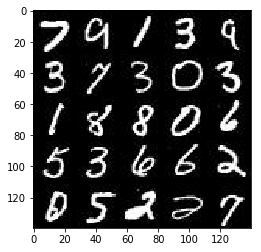

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

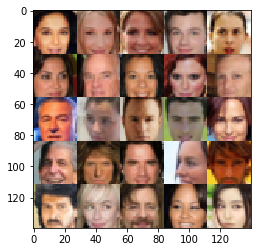

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_dim = (image_width, image_height, image_channels)
    real_inputs = tf.placeholder(tf.float32, (None, *real_dim), name='real_input')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [9]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='valid')
        l1 = tf.maximum(alpha * l1, l1)
        
        l2 = tf.layers.conv2d(l1, 128, 5, strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=True)
        l2 = tf.maximum(alpha * l2, l2)
        
        l3 = tf.layers.conv2d(l2, 256, 5, strides=2, padding='valid')
        l3 = tf.layers.batch_normalization(l3, training=True)
        l3 = tf.maximum(alpha * l3, l3)
        

        #changes:
        l4 = tf.layers.conv2d(l3, 512, 5, strides=2, padding='same')
        l4 = tf.layers.batch_normalization(l4, training=True)
        l4 = tf.maximum(alpha * l4, l4)
        
        flat = tf.contrib.layers.flatten(l4)
        tensor_logits = tf.layers.dense(flat, 1)
        tensor_output = tf.sigmoid(tensor_logits)
        
    return tensor_output, tensor_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [15]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2, dropout=0.9):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        l1 = tf.layers.dense(z, 4*4*512)
        l1 = tf.reshape(l1, (-1, 4, 4, 512))
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        l1 = tf.maximum(alpha * l1, l1)
        l1 = tf.nn.dropout(l1, dropout)
        
        l2 = tf.layers.conv2d_transpose(l1, 256,5, strides=3, padding='valid')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = tf.maximum(alpha * l2, l2)
        
        l3 = tf.layers.conv2d_transpose(l2, 128, 5, strides=1, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = tf.maximum(alpha * l3, l3)
        
        l4 = tf.layers.conv2d_transpose(l3, 64, 5, strides=1, padding='same')
        l4 = tf.layers.batch_normalization(l4, training=is_train)
        l4 = tf.maximum(alpha * l4, l4)
        
        tensor_logits = tf.layers.conv2d_transpose(l4, out_channel_dim, 5, strides=2, padding='same')
        tensor_output = tf.tanh(tensor_logits)
            
    return tensor_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [16]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_real, labels=tf.ones_like(d_model_real * 0.9)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, labels=tf.ones_like(d_model_fake * 0.9)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [17]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [23]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    inputs_real, inputs_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)  
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        log_path = '/tmp/tensorboard/data/mnist'
        writer = tf.summary.FileWriter(log_path, graph=sess.graph)
    
        for epoch_i in range(epoch_count):
            for image in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                image = image*2

                batch_z = np.random.uniform(-1, 1, size=(100, z_dim))

                _ = sess.run(d_opt, feed_dict={inputs_real: image, inputs_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={inputs_z: batch_z, learn_rate: learning_rate})
                
                if steps % 20 == 0:
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: image})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 200 == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                    
        show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode) 
        
        print("\nFinished")

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.3405... Generator Loss: 0.7944
Epoch 1/2... Discriminator Loss: 1.3693... Generator Loss: 1.0311
Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 0.9844
Epoch 1/2... Discriminator Loss: 0.8967... Generator Loss: 0.9815
Epoch 1/2... Discriminator Loss: 0.9631... Generator Loss: 1.0341
Epoch 1/2... Discriminator Loss: 1.3565... Generator Loss: 0.7238
Epoch 1/2... Discriminator Loss: 1.4197... Generator Loss: 0.6007
Epoch 1/2... Discriminator Loss: 1.2220... Generator Loss: 0.7994
Epoch 1/2... Discriminator Loss: 1.4146... Generator Loss: 0.7331
Epoch 1/2... Discriminator Loss: 1.2033... Generator Loss: 0.7651


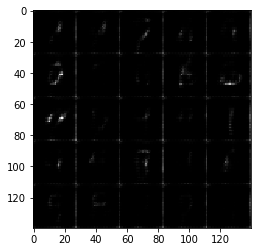

Epoch 1/2... Discriminator Loss: 1.3559... Generator Loss: 0.7898
Epoch 1/2... Discriminator Loss: 1.2400... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.2319... Generator Loss: 0.6800
Epoch 1/2... Discriminator Loss: 1.2823... Generator Loss: 0.7385
Epoch 1/2... Discriminator Loss: 1.3178... Generator Loss: 0.6281
Epoch 1/2... Discriminator Loss: 1.1639... Generator Loss: 0.7105
Epoch 1/2... Discriminator Loss: 1.1581... Generator Loss: 0.7738
Epoch 1/2... Discriminator Loss: 1.2066... Generator Loss: 0.7544
Epoch 1/2... Discriminator Loss: 1.1571... Generator Loss: 0.8432
Epoch 1/2... Discriminator Loss: 1.2843... Generator Loss: 0.7257


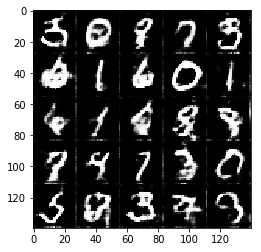

Epoch 1/2... Discriminator Loss: 1.1115... Generator Loss: 0.8308
Epoch 1/2... Discriminator Loss: 1.3014... Generator Loss: 0.8960
Epoch 1/2... Discriminator Loss: 1.3074... Generator Loss: 0.8775
Epoch 1/2... Discriminator Loss: 1.1060... Generator Loss: 0.7542
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 0.7683
Epoch 1/2... Discriminator Loss: 1.0607... Generator Loss: 0.8761
Epoch 1/2... Discriminator Loss: 1.3557... Generator Loss: 0.7988
Epoch 1/2... Discriminator Loss: 1.1340... Generator Loss: 0.8829
Epoch 1/2... Discriminator Loss: 1.2947... Generator Loss: 0.7306
Epoch 1/2... Discriminator Loss: 1.0412... Generator Loss: 0.8078


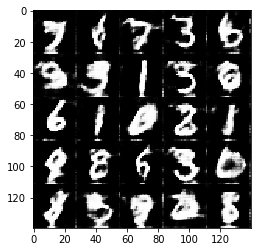

Epoch 1/2... Discriminator Loss: 1.2858... Generator Loss: 0.6389
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 0.7892
Epoch 1/2... Discriminator Loss: 1.4079... Generator Loss: 0.8963
Epoch 1/2... Discriminator Loss: 1.1278... Generator Loss: 0.7264
Epoch 1/2... Discriminator Loss: 1.1110... Generator Loss: 0.7148
Epoch 1/2... Discriminator Loss: 1.0990... Generator Loss: 0.7037
Epoch 1/2... Discriminator Loss: 1.1462... Generator Loss: 0.6841
Epoch 1/2... Discriminator Loss: 1.0772... Generator Loss: 0.7621
Epoch 1/2... Discriminator Loss: 1.3816... Generator Loss: 0.5340
Epoch 1/2... Discriminator Loss: 0.9958... Generator Loss: 0.8894


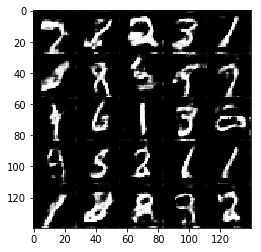

Epoch 1/2... Discriminator Loss: 1.0031... Generator Loss: 0.8364
Epoch 1/2... Discriminator Loss: 1.2177... Generator Loss: 0.7839
Epoch 1/2... Discriminator Loss: 1.3750... Generator Loss: 0.6498
Epoch 1/2... Discriminator Loss: 1.0595... Generator Loss: 0.8897
Epoch 1/2... Discriminator Loss: 1.2025... Generator Loss: 0.5926
Epoch 1/2... Discriminator Loss: 0.9987... Generator Loss: 0.8531
Epoch 2/2... Discriminator Loss: 0.9120... Generator Loss: 1.0866
Epoch 2/2... Discriminator Loss: 0.8280... Generator Loss: 1.0192
Epoch 2/2... Discriminator Loss: 0.8564... Generator Loss: 1.0445
Epoch 2/2... Discriminator Loss: 0.9164... Generator Loss: 1.1575


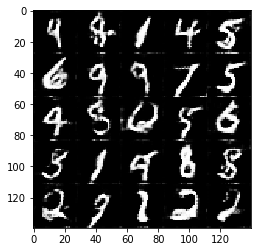

Epoch 2/2... Discriminator Loss: 1.1901... Generator Loss: 1.3398
Epoch 2/2... Discriminator Loss: 1.0123... Generator Loss: 0.7415
Epoch 2/2... Discriminator Loss: 0.8757... Generator Loss: 0.7982
Epoch 2/2... Discriminator Loss: 1.1795... Generator Loss: 0.5592
Epoch 2/2... Discriminator Loss: 1.4831... Generator Loss: 0.3674
Epoch 2/2... Discriminator Loss: 1.0526... Generator Loss: 0.7127
Epoch 2/2... Discriminator Loss: 1.1648... Generator Loss: 0.7448
Epoch 2/2... Discriminator Loss: 1.1207... Generator Loss: 0.6509
Epoch 2/2... Discriminator Loss: 0.9459... Generator Loss: 1.4605
Epoch 2/2... Discriminator Loss: 0.7899... Generator Loss: 1.0781


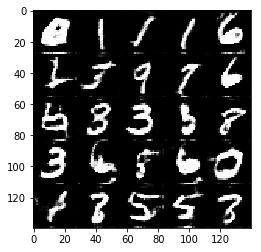

Epoch 2/2... Discriminator Loss: 0.7832... Generator Loss: 1.4677
Epoch 2/2... Discriminator Loss: 0.7900... Generator Loss: 1.0743
Epoch 2/2... Discriminator Loss: 1.0833... Generator Loss: 0.6315
Epoch 2/2... Discriminator Loss: 0.8097... Generator Loss: 1.0035
Epoch 2/2... Discriminator Loss: 1.0631... Generator Loss: 0.7418
Epoch 2/2... Discriminator Loss: 1.0531... Generator Loss: 0.6576
Epoch 2/2... Discriminator Loss: 0.7242... Generator Loss: 1.6003
Epoch 2/2... Discriminator Loss: 0.6498... Generator Loss: 1.2782
Epoch 2/2... Discriminator Loss: 0.7468... Generator Loss: 1.7388
Epoch 2/2... Discriminator Loss: 1.3702... Generator Loss: 0.5161


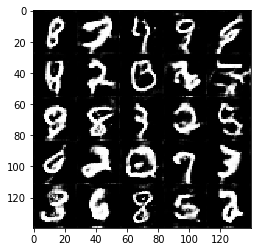

Epoch 2/2... Discriminator Loss: 0.8082... Generator Loss: 0.7738
Epoch 2/2... Discriminator Loss: 0.5835... Generator Loss: 1.1597
Epoch 2/2... Discriminator Loss: 1.1859... Generator Loss: 0.5950
Epoch 2/2... Discriminator Loss: 1.1355... Generator Loss: 0.6258
Epoch 2/2... Discriminator Loss: 0.8657... Generator Loss: 1.2030
Epoch 2/2... Discriminator Loss: 1.4129... Generator Loss: 0.4205
Epoch 2/2... Discriminator Loss: 0.6349... Generator Loss: 1.3071
Epoch 2/2... Discriminator Loss: 0.6663... Generator Loss: 1.1171
Epoch 2/2... Discriminator Loss: 2.0625... Generator Loss: 2.8502
Epoch 2/2... Discriminator Loss: 0.8806... Generator Loss: 1.4640


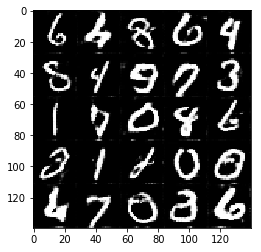

Epoch 2/2... Discriminator Loss: 0.8875... Generator Loss: 0.8519
Epoch 2/2... Discriminator Loss: 1.0809... Generator Loss: 0.5781
Epoch 2/2... Discriminator Loss: 0.6855... Generator Loss: 0.9962
Epoch 2/2... Discriminator Loss: 0.5790... Generator Loss: 1.2571
Epoch 2/2... Discriminator Loss: 0.5370... Generator Loss: 1.1787
Epoch 2/2... Discriminator Loss: 0.3722... Generator Loss: 1.5507
Epoch 2/2... Discriminator Loss: 1.6078... Generator Loss: 0.3206
Epoch 2/2... Discriminator Loss: 0.4669... Generator Loss: 1.2939
Epoch 2/2... Discriminator Loss: 1.6273... Generator Loss: 0.3678
Epoch 2/2... Discriminator Loss: 0.6704... Generator Loss: 0.9430


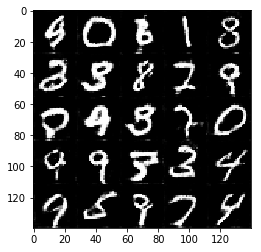

Epoch 2/2... Discriminator Loss: 0.7070... Generator Loss: 1.0143
Epoch 2/2... Discriminator Loss: 0.8705... Generator Loss: 0.8100
Epoch 2/2... Discriminator Loss: 1.2599... Generator Loss: 0.5579


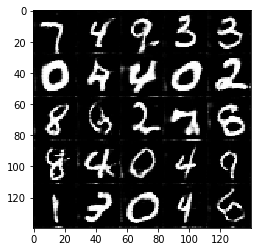


Finished


In [24]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.1528... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.1389... Generator Loss: 0.9286
Epoch 1/1... Discriminator Loss: 0.8490... Generator Loss: 1.0093
Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 1.1182
Epoch 1/1... Discriminator Loss: 0.8542... Generator Loss: 1.0165
Epoch 1/1... Discriminator Loss: 1.1718... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.2026... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.7727


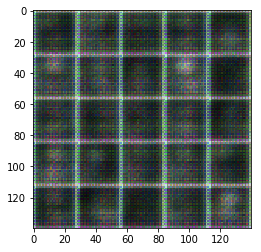

Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.8028
Epoch 1/1... Discriminator Loss: 1.2463... Generator Loss: 0.8111
Epoch 1/1... Discriminator Loss: 1.2460... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.1834... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.1710... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.7623
Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 0.7639


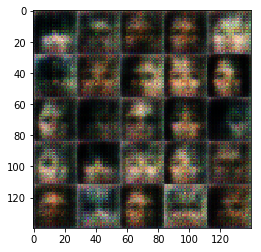

Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.2575... Generator Loss: 0.7576
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 1.2717... Generator Loss: 0.7451
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 1.2733... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.7314


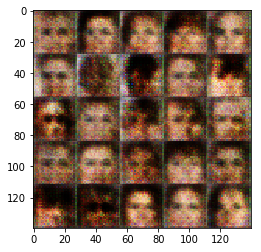

Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.7351
Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.7258
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.6935


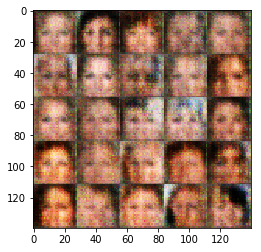

Epoch 1/1... Discriminator Loss: 1.2763... Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.2916... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.7281
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.7328


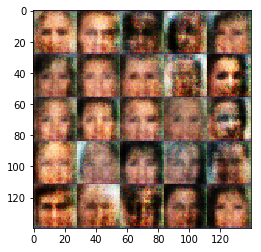

Epoch 1/1... Discriminator Loss: 1.2535... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 0.7076
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 0.7025
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.2643... Generator Loss: 0.7304


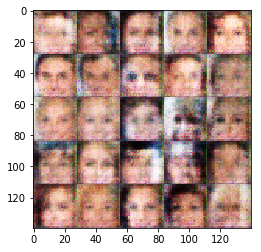

Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 0.7296
Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.7176
Epoch 1/1... Discriminator Loss: 1.2272... Generator Loss: 0.7430
Epoch 1/1... Discriminator Loss: 1.2578... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.2437... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.2802... Generator Loss: 0.7256


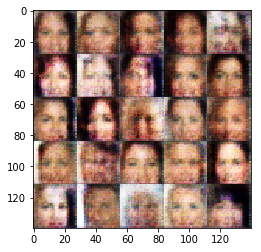

Epoch 1/1... Discriminator Loss: 1.2236... Generator Loss: 0.7311
Epoch 1/1... Discriminator Loss: 1.2500... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.7231
Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.7126
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 0.7269
Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 0.7157


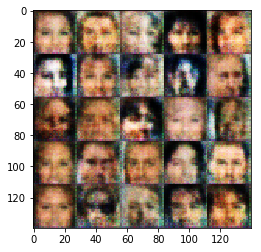

Epoch 1/1... Discriminator Loss: 1.2900... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.7283
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.7176
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.7171
Epoch 1/1... Discriminator Loss: 1.2205... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.7600


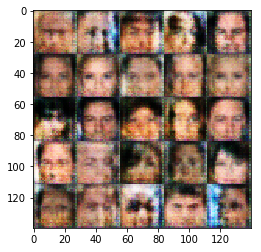

Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.7201
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 0.7508
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 1.2377... Generator Loss: 0.7451
Epoch 1/1... Discriminator Loss: 1.2631... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.6622
Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.6774


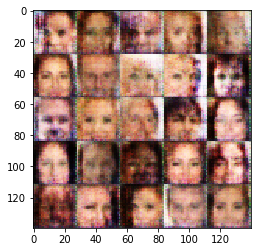

Epoch 1/1... Discriminator Loss: 1.2071... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.6670
Epoch 1/1... Discriminator Loss: 1.2812... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.2420... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.7607


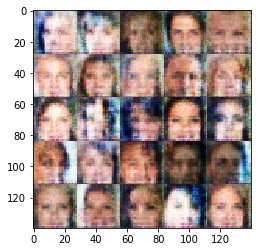

Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 0.7555
Epoch 1/1... Discriminator Loss: 1.2546... Generator Loss: 0.7214
Epoch 1/1... Discriminator Loss: 1.2454... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.2174... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.2277... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.2303... Generator Loss: 0.7271
Epoch 1/1... Discriminator Loss: 1.2429... Generator Loss: 0.6939


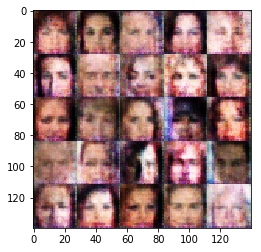

Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.2415... Generator Loss: 0.7162
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.1806... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.2670... Generator Loss: 0.7007
Epoch 1/1... Discriminator Loss: 1.2174... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.7253


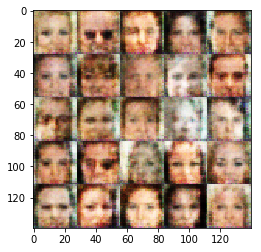

Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.2282... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.2670... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 0.7618
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.7002
Epoch 1/1... Discriminator Loss: 1.2012... Generator Loss: 0.7624


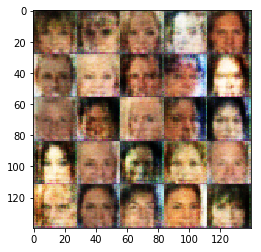

Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.6969
Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.2202... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.7256


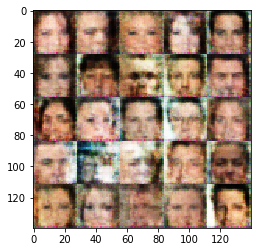

Epoch 1/1... Discriminator Loss: 1.1636... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 0.7256


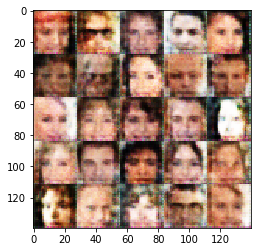


Finished


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.